<h2>Insurance </h2>

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [139]:
df=pd.read_csv('insurance.csv')
df
# it is a regression problem statement
# use linear,DTR,random forest algo 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [140]:
# second method of include file without saving csv file
# df2=pd.read_csv("https://raw.githubusercontent.com/Ranjit-Singh-786/insorance-Premium-Prediction/master/insurance.csv")
# df2.head()

In [141]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [142]:
df.columns=['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges']

In [143]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [145]:
df['region'].value_counts() # kitne region h or kitne candidate h

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [146]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [147]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [148]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [149]:
# average charges
df['charges'].mean()

np.float64(13270.422265141257)

<h3>filtering the data </h3>

In [150]:
male=df[df['gender']=="male"]
male


,age,gender,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [151]:
female=df[df['gender']=="female"]
female

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


<h4>Mean charges of female and male </h4>

In [152]:
print("male averages : ",male['charges'].mean())
print("female avg : ",female['charges'].mean())


male averages :  13956.751177721893
female avg :  12569.578843835347


In [153]:
# Statics for interview
# population or sample 

In [154]:
# charges of female is less then averages charges

In [155]:
df2=female[female['charges']<female['charges'].mean()]
df2.head()

,age,gender,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [156]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [157]:
df2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [158]:
df2['region'].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [159]:
# bmi<18.5==>underweight,bmi 18.5 to 24.=> healthy weight, bmi 25.0 to 29.9 ==> overweight

In [160]:
#def cat_bmi(bmi):
    # if bmi < 18.5:
    #     return 'Underweight'
    # elif 18.5 <= bmi < 25.0:
    #     return 'HealthyWeight'
    # elif 25.0 <= bmi < 30.0:
    #     return 'Overweight'
    # else:
    #     return None

In [161]:
ls=list(df['bmi'])
ls

[27.9,
 33.77,
 33.0,
 22.705,
 28.88,
 25.74,
 33.44,
 27.74,
 29.83,
 25.84,
 26.22,
 26.29,
 34.4,
 39.82,
 42.13,
 24.6,
 30.78,
 23.845,
 40.3,
 35.3,
 36.005,
 32.4,
 34.1,
 31.92,
 28.025,
 27.72,
 23.085,
 32.775,
 17.385,
 36.3,
 35.6,
 26.315,
 28.6,
 28.31,
 36.4,
 20.425,
 32.965,
 20.8,
 36.67,
 39.9,
 26.6,
 36.63,
 21.78,
 30.8,
 37.05,
 37.3,
 38.665,
 34.77,
 24.53,
 35.2,
 35.625,
 33.63,
 28.0,
 34.43,
 28.69,
 36.955,
 31.825,
 31.68,
 22.88,
 37.335,
 27.36,
 33.66,
 24.7,
 25.935,
 22.42,
 28.9,
 39.1,
 26.315,
 36.19,
 23.98,
 24.75,
 28.5,
 28.1,
 32.01,
 27.4,
 34.01,
 29.59,
 35.53,
 39.805,
 32.965,
 26.885,
 38.285,
 37.62,
 41.23,
 34.8,
 22.895,
 31.16,
 27.2,
 27.74,
 26.98,
 39.49,
 24.795,
 29.83,
 34.77,
 31.3,
 37.62,
 30.8,
 38.28,
 19.95,
 19.3,
 31.6,
 25.46,
 30.115,
 29.92,
 27.5,
 28.025,
 28.4,
 30.875,
 27.94,
 35.09,
 33.63,
 29.7,
 30.8,
 35.72,
 32.205,
 28.595,
 49.06,
 27.94,
 27.17,
 23.37,
 37.1,
 23.75,
 28.975,
 31.35,
 33.915,
 28.78

In [162]:
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [163]:
len(label)

1338

In [164]:
label

['Overweight',
 'obese',
 'obese',
 'HealthyWeight',
 'Overweight',
 'Overweight',
 'obese',
 'Overweight',
 'Overweight',
 'Overweight',
 'Overweight',
 'Overweight',
 'obese',
 'obese',
 'obese',
 'HealthyWeight',
 'obese',
 'HealthyWeight',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'Overweight',
 'Overweight',
 'HealthyWeight',
 'obese',
 'Underweight',
 'obese',
 'obese',
 'Overweight',
 'Overweight',
 'Overweight',
 'obese',
 'HealthyWeight',
 'obese',
 'HealthyWeight',
 'obese',
 'obese',
 'Overweight',
 'obese',
 'HealthyWeight',
 'obese',
 'obese',
 'obese',
 'obese',
 'obese',
 'HealthyWeight',
 'obese',
 'obese',
 'obese',
 'Overweight',
 'obese',
 'Overweight',
 'obese',
 'obese',
 'obese',
 'HealthyWeight',
 'obese',
 'Overweight',
 'obese',
 'HealthyWeight',
 'Overweight',
 'HealthyWeight',
 'Overweight',
 'obese',
 'Overweight',
 'obese',
 'HealthyWeight',
 'HealthyWeight',
 'Overweight',
 'Overweight',
 'obese',
 'Overweight',
 'obese',
 'Overweight',


</h3>Create new column of weight --- Featue Engineering </h3>

In [165]:
df["weight"]=label

In [166]:
df

,age,gender,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [167]:
health_group=(df.groupby(by="weight"))
health_group

</h4>Aggregate function </h4>

In [168]:
health_analysis=health_group["charges"].agg(max="min",mean="mean",min="min")
health_analysis

,max,mean,min
weight,,,
HealthyWeight,1121.8739,10404.900084,1121.8739
Overweight,1252.4070,11020.183782,1252.4070
Underweight,1621.3402,8852.200585,1621.3402
obese,1131.5066,15420.399577,1131.5066


In [169]:
health_group=list(health_analysis.index)   # index return
health_group

['HealthyWeight', 'Overweight', 'Underweight', 'obese']

In [170]:
avg_charges=(health_analysis['mean'].values)
avg_charges

array([10404.90008389, 11020.18378226,  8852.200585  , 15420.39957727])

<h3>Bar plot </h3>

<function matplotlib.pyplot.show(close=None, block=None)>

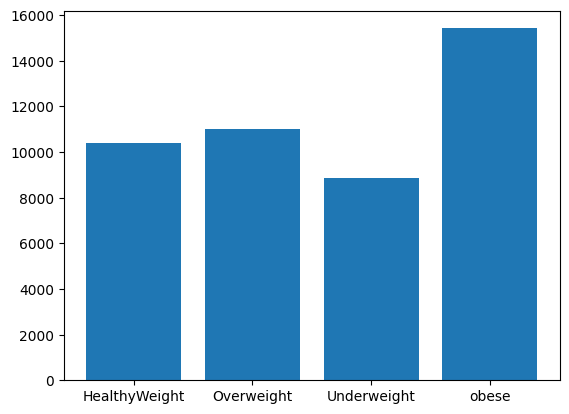

In [171]:
plt.bar(health_group,avg_charges)
plt.show

<h3>pie plot </h3>

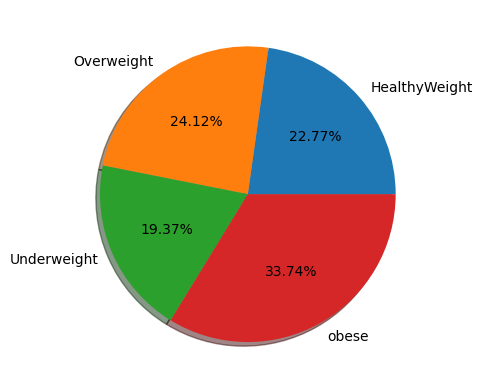

In [172]:
plt.pie(avg_charges,labels=health_group,autopct="%1.2f%%",shadow=True)
plt.show()

<h3>scatter plot</h3>

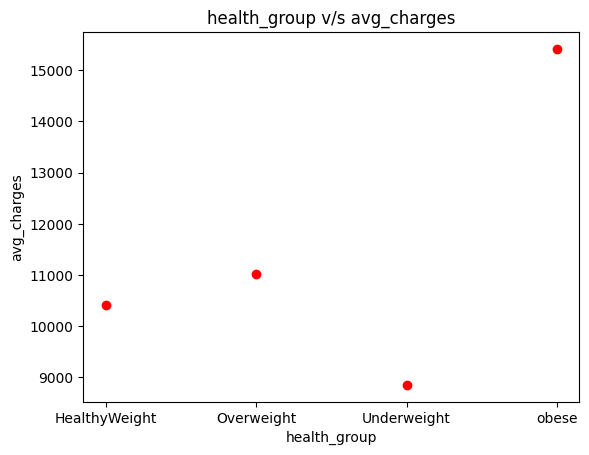

In [173]:
plt.scatter(health_group,avg_charges,color="red")
plt.xlabel('health_group')
plt.ylabel('avg_charges')
plt.title('health_group v/s avg_charges')
plt.show()


<h3>box plot</h3>

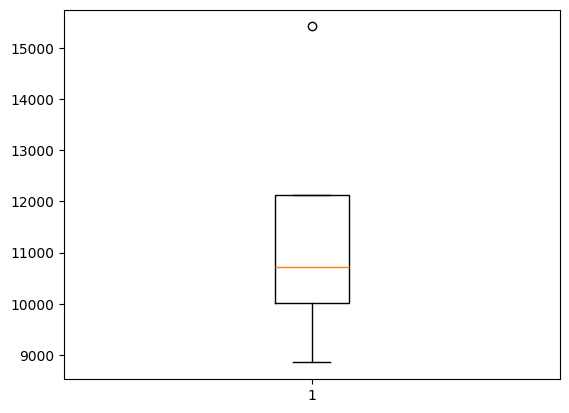

In [174]:
plt.boxplot(avg_charges)
plt.show()

In [175]:
region_group=(df.groupby(by="region"))
region_group

In [176]:
region_analysis=region_group["charges"].agg(min="min",max="max",mean="mean")
region_analysis

,min,max,mean
region,,,
northeast,1694.7964,58571.07448,13406.384516
northwest,1621.3402,60021.39897,12417.575374
southeast,1121.8739,63770.42801,14735.411438
southwest,1241.5650,52590.82939,12346.937377


In [177]:
analysis_group=list(region_analysis.index)
analysis_group

['northeast', 'northwest', 'southeast', 'southwest']

In [178]:
region_charges=region_analysis['mean'].values
region_charges

array([13406.38451639, 12417.57537397, 14735.41143761, 12346.93737729])

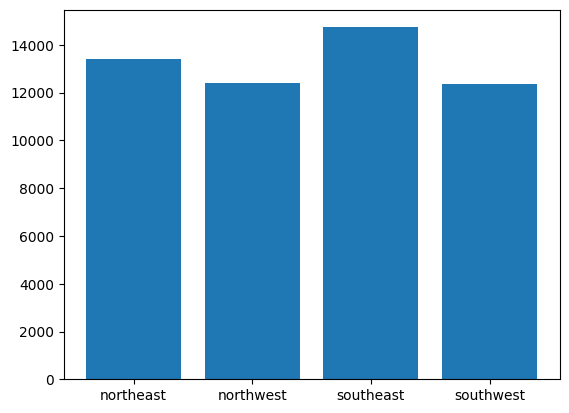

In [179]:
plt.bar(analysis_group,region_charges)
plt.show()

##### pie chart

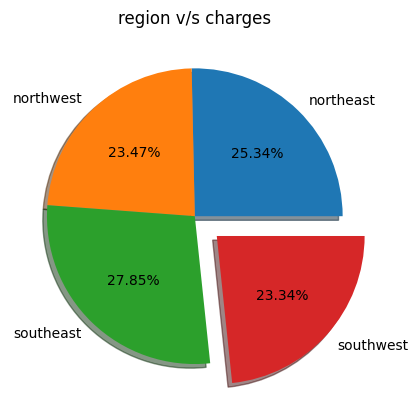

In [180]:
explosion=[0,0,0,0.2]
plt.pie(region_charges,labels=analysis_group,autopct="%1.2f%%",explode=explosion,shadow=True)
plt.title("region v/s charges")
plt.show()

##### scatter graph

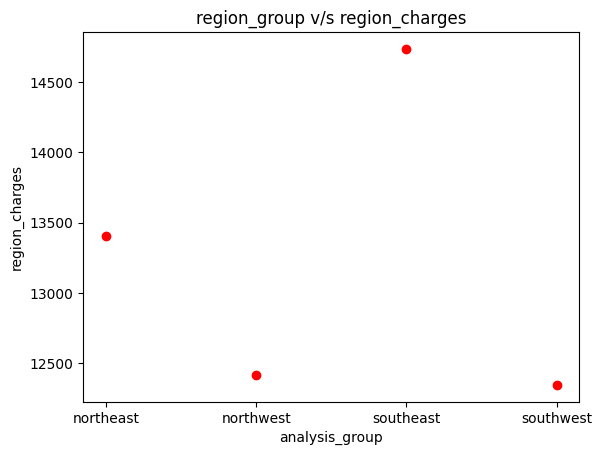

In [181]:
plt.scatter(analysis_group,region_charges,color="red")
plt.xlabel("analysis_group")
plt.ylabel("region_charges")
plt.title('region_group v/s region_charges')
plt.show()

##### boxplot

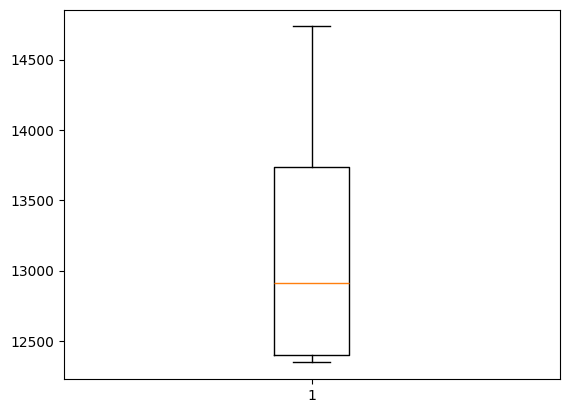

In [182]:
plt.boxplot(region_charges)
plt.show()

In [183]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


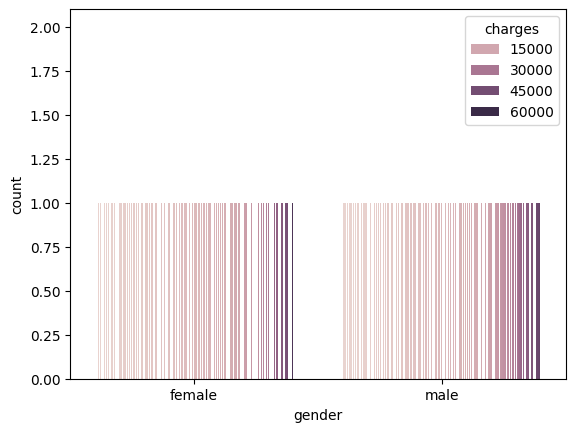

In [184]:
sns.countplot(x="gender",hue="charges",data=df)
plt.show()

##### seaborn relplot,catplot

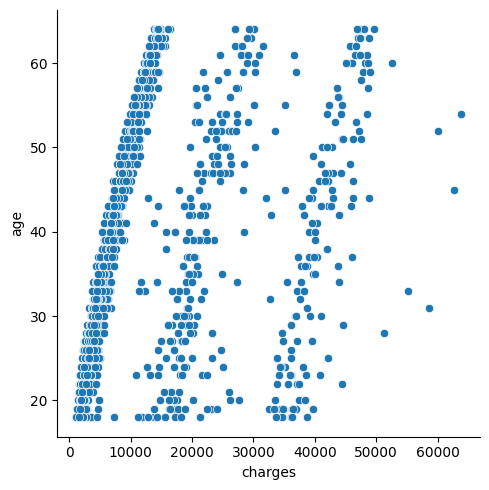

In [185]:
sns.relplot(x="charges",y="age",data=df)

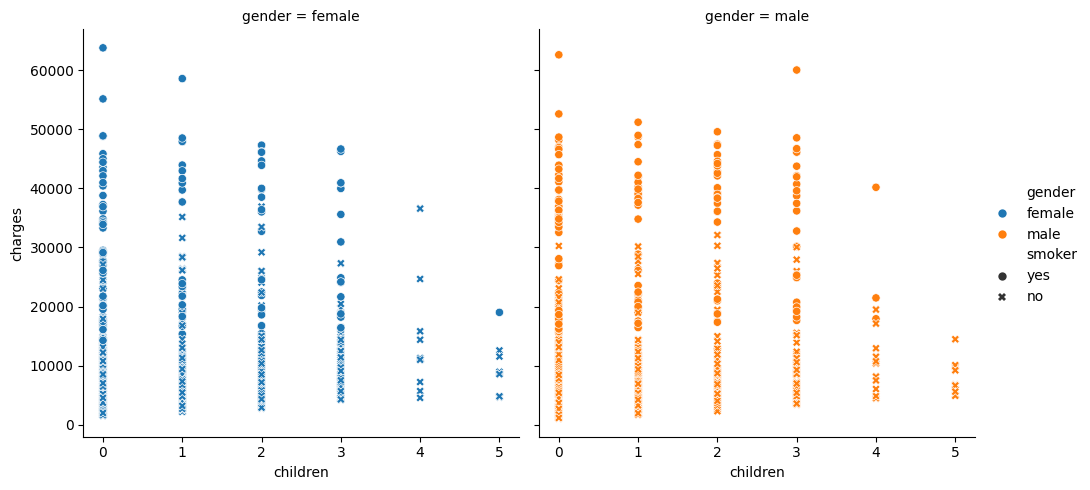

In [186]:
sns.relplot(x="children",y="charges",data=df,hue="gender",style="smoker",col="gender")
plt.show()

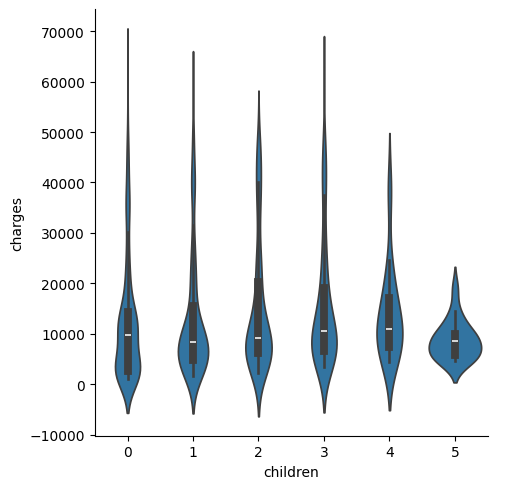

In [187]:
sns.catplot(x="children",y="charges",kind="violin",data=df)

In [188]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


<h4>filter the female dataframe to age</h4>

In [189]:
age_list=list(female['age'])
age_list

[19,
 31,
 46,
 37,
 60,
 62,
 56,
 52,
 60,
 30,
 34,
 59,
 63,
 55,
 18,
 19,
 62,
 24,
 31,
 37,
 18,
 28,
 60,
 18,
 21,
 40,
 58,
 53,
 34,
 28,
 20,
 19,
 61,
 40,
 27,
 53,
 29,
 22,
 41,
 45,
 48,
 37,
 57,
 56,
 46,
 55,
 21,
 53,
 64,
 28,
 54,
 41,
 18,
 61,
 34,
 19,
 55,
 21,
 29,
 49,
 37,
 20,
 47,
 26,
 19,
 52,
 32,
 59,
 61,
 53,
 20,
 22,
 54,
 22,
 29,
 51,
 53,
 32,
 42,
 40,
 50,
 42,
 18,
 32,
 20,
 32,
 19,
 35,
 24,
 63,
 46,
 41,
 18,
 44,
 26,
 30,
 41,
 29,
 36,
 56,
 39,
 45,
 51,
 64,
 19,
 48,
 60,
 27,
 28,
 63,
 34,
 45,
 41,
 53,
 26,
 24,
 34,
 53,
 58,
 41,
 42,
 59,
 19,
 40,
 18,
 23,
 33,
 55,
 63,
 60,
 63,
 55,
 38,
 58,
 20,
 53,
 59,
 47,
 22,
 51,
 40,
 55,
 52,
 46,
 63,
 59,
 28,
 22,
 48,
 53,
 56,
 28,
 57,
 28,
 30,
 41,
 19,
 27,
 44,
 26,
 27,
 64,
 61,
 61,
 56,
 43,
 46,
 24,
 60,
 49,
 34,
 36,
 57,
 50,
 30,
 18,
 18,
 48,
 19,
 21,
 21,
 49,
 56,
 42,
 61,
 57,
 42,
 23,
 39,
 64,
 27,
 35,
 58,
 26,
 24,
 19,
 46,
 43,
 18,
 51,


In [190]:
len(age_list)

662

<h4>Divide the age into three group--> adult,youth,old</h4>

In [191]:
new_age_list=[]
for age in age_list:
    if age>=18 and age<=25:
        new_age_list.append("Youth")
    elif age>25 and age<=40:
        new_age_list.append("Adult")
    elif age>40 and age<=64:
        new_age_list.append("Old")
new_age_list
    
    

['Youth',
 'Adult',
 'Old',
 'Adult',
 'Old',
 'Old',
 'Old',
 'Old',
 'Old',
 'Adult',
 'Adult',
 'Old',
 'Old',
 'Old',
 'Youth',
 'Youth',
 'Old',
 'Youth',
 'Adult',
 'Adult',
 'Youth',
 'Adult',
 'Old',
 'Youth',
 'Youth',
 'Adult',
 'Old',
 'Old',
 'Adult',
 'Adult',
 'Youth',
 'Youth',
 'Old',
 'Adult',
 'Adult',
 'Old',
 'Adult',
 'Youth',
 'Old',
 'Old',
 'Old',
 'Adult',
 'Old',
 'Old',
 'Old',
 'Old',
 'Youth',
 'Old',
 'Old',
 'Adult',
 'Old',
 'Old',
 'Youth',
 'Old',
 'Adult',
 'Youth',
 'Old',
 'Youth',
 'Adult',
 'Old',
 'Adult',
 'Youth',
 'Old',
 'Adult',
 'Youth',
 'Old',
 'Adult',
 'Old',
 'Old',
 'Old',
 'Youth',
 'Youth',
 'Old',
 'Youth',
 'Adult',
 'Old',
 'Old',
 'Adult',
 'Old',
 'Adult',
 'Old',
 'Old',
 'Youth',
 'Adult',
 'Youth',
 'Adult',
 'Youth',
 'Adult',
 'Youth',
 'Old',
 'Old',
 'Old',
 'Youth',
 'Old',
 'Adult',
 'Adult',
 'Old',
 'Adult',
 'Adult',
 'Old',
 'Adult',
 'Old',
 'Old',
 'Old',
 'Youth',
 'Old',
 'Old',
 'Adult',
 'Adult',
 'Old',
 'Ad

In [192]:
len(new_age_list)

662

In [193]:
female["age_label"]=new_age_list          # new column

C:\Users\hp\AppData\Local\Temp\ipykernel_8284\660693434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female["age_label"]=new_age_list          # new column


In [194]:
female.head()

,age,gender,bmi,children,smoker,region,charges,age_label
0,19,female,27.90,0,yes,southwest,16884.92400,Youth
5,31,female,25.74,0,no,southeast,3756.62160,Adult
6,46,female,33.44,1,no,southeast,8240.58960,Old
7,37,female,27.74,3,no,northwest,7281.50560,Adult
9,60,female,25.84,0,no,northwest,28923.13692,Old


In [195]:
group_age=female.groupby(by="age_label")
group_age

In [196]:
age_analysis=group_age['charges'].agg(min="min",max="max",mean="mean")
age_analysis

,min,max,mean
age_label,,,
Adult,2974.1260,58571.07448,10135.871487
Old,6185.3208,63770.42801,15870.294140
Youth,1607.5101,40904.19950,8573.725900


In [197]:
age_classes=list(age_analysis.index)
age_classes

['Adult', 'Old', 'Youth']

In [198]:
min_age_charges=age_analysis["min"].values
min_age_charges

array([2974.126 , 6185.3208, 1607.5101])

In [199]:
max_age_charges=age_analysis['max'].values
max_age_charges

array([58571.07448, 63770.42801, 40904.1995 ])

In [200]:
mean_age_charges=age_analysis['mean'].values
mean_age_charges

array([10135.87148701, 15870.29413978,  8573.72589979])

<h3>Graphical Representation </h3>

<h4>Bar Plot</h4>

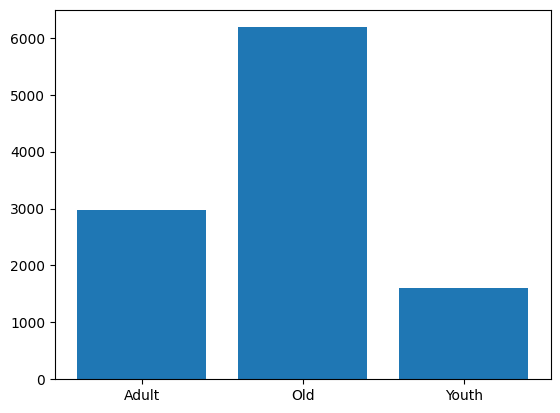

In [201]:
plt.bar(age_classes,min_age_charges)
plt.show()

<h4>Pie Plot </h4>

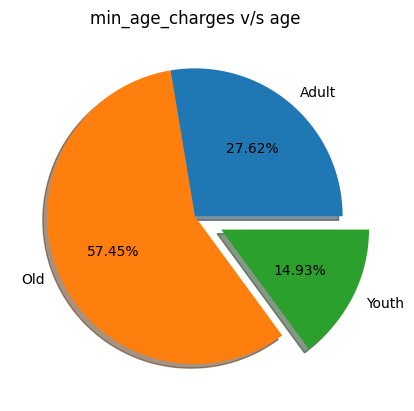

In [202]:
explosion=[0,0,0.2]
plt.pie(min_age_charges,labels=age_classes,autopct="%1.2f%%",explode=explosion,shadow=True)
plt.title("min_age_charges v/s age")
plt.show()

<h4> BoxPlot</h4>

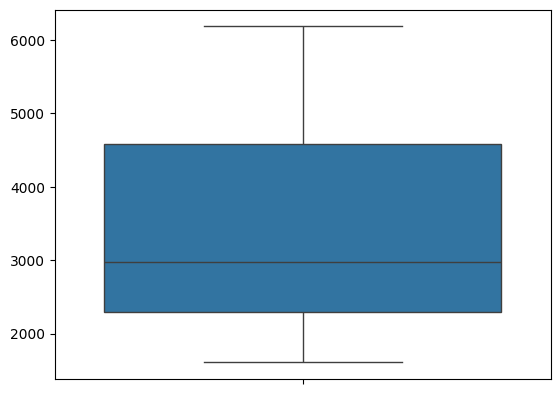

In [203]:
sns.boxplot(min_age_charges)
plt.show()

</h4>Catplot(by- seaborn )</h4>

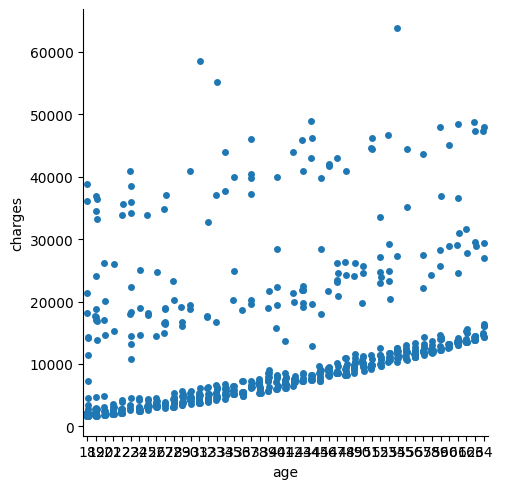

In [204]:
sns.catplot(x="age",y="charges",data=female)
plt.show()

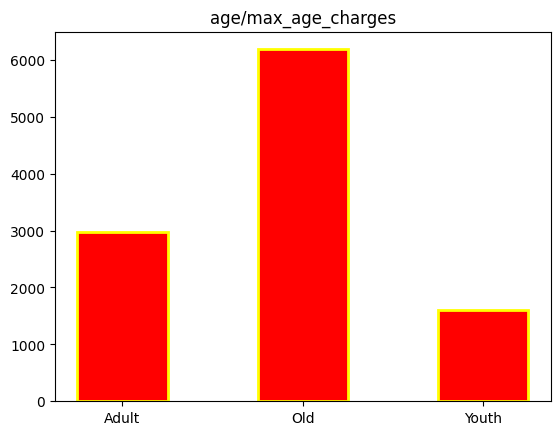

In [205]:
plt.bar(age_classes,min_age_charges,color="red",ec="yellow",width=0.5,lw=2)
plt.title("age/max_age_charges")
plt.show()

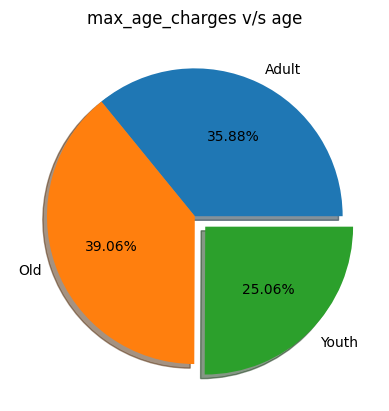

In [206]:
explosion=[0,0,0.1]
plt.pie(max_age_charges,labels=age_classes,autopct="%1.2f%%",explode=explosion,shadow=True)
plt.title("max_age_charges v/s age")
plt.show()

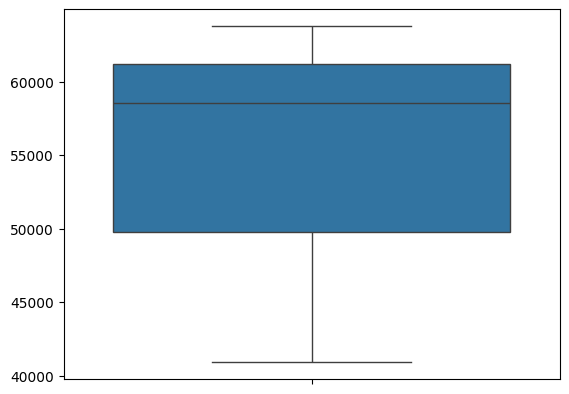

In [207]:
sns.boxplot(max_age_charges)
plt.show()

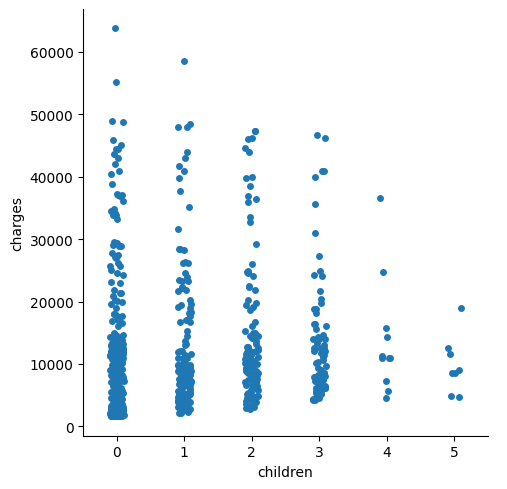

In [208]:
sns.catplot(x="children",y="charges",data=female)
plt.show()

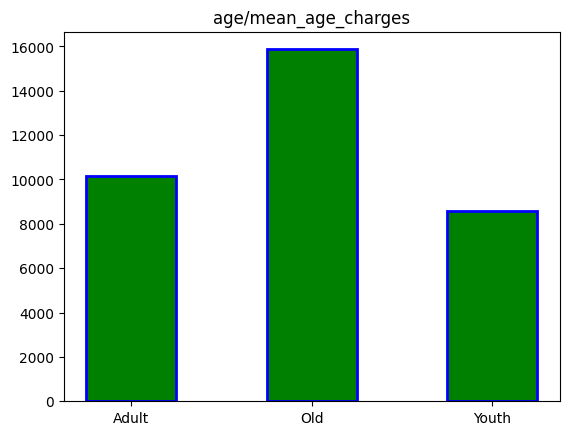

In [209]:
plt.bar(age_classes,mean_age_charges,color="green",ec="blue",width=0.5,lw=2)
plt.title("age/mean_age_charges")
plt.show()

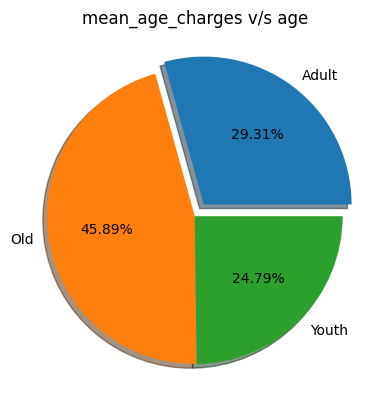

In [210]:
explosion=[0.1,0,0]
plt.pie(mean_age_charges,labels=age_classes,autopct="%1.2f%%",explode=explosion,shadow=True)
plt.title("mean_age_charges v/s age")
plt.show()

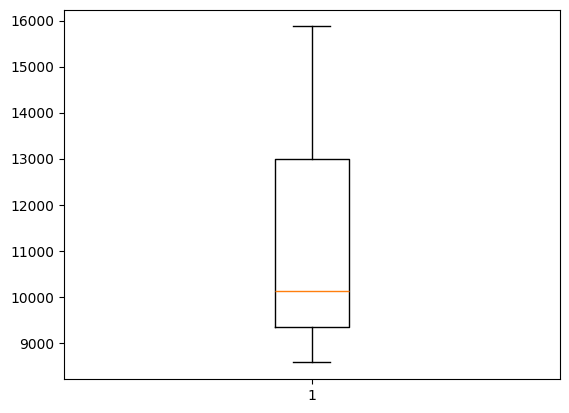

In [211]:
plt.boxplot(mean_age_charges)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8284\3345074809.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.catplot(x="smoker",y="charges",data=female,color="red",hue="smoker")


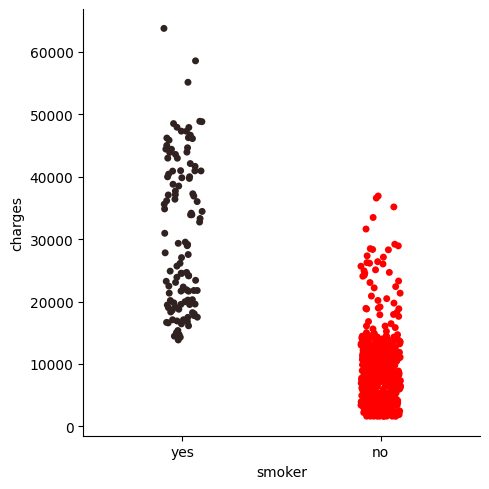

In [212]:
sns.catplot(x="smoker",y="charges",data=female,color="red",hue="smoker")
plt.show()

#### filtering and ploting data by converting catgorical column into numerical columns.
##### OneHot encoding:->>> 0 and 1 form. used of columns are distingguisable.
##### Onecode encoding:->>> 1,2,3... form . used if columns value are not distingguisable.

In [213]:
# gender==> onehot encode
gender_dict={'female':0,'male':1}
smoker_dict={'yes':1,'no':0}

df['gender']=df['gender'].map(gender_dict)
df['smoker']=df['smoker'].map(smoker_dict)
# execute singl time only

In [214]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,Overweight
1,18,1,33.770,1,0,southeast,1725.55230,obese
2,28,1,33.000,3,0,southeast,4449.46200,obese
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight
4,32,1,28.880,0,0,northwest,3866.85520,Overweight


In [215]:
df.weight
# df.health_category.value_counts().keys()

0          Overweight
1               obese
2               obese
3       HealthyWeight
4          Overweight
            ...      
1333            obese
1334            obese
1335            obese
1336       Overweight
1337       Overweight
Name: weight, Length: 1338, dtype: object

In [216]:
health_count=df['weight'].value_counts().keys()

In [217]:
health_list=df['weight'].value_counts().values

In [218]:
health_group

['HealthyWeight', 'Overweight', 'Underweight', 'obese']

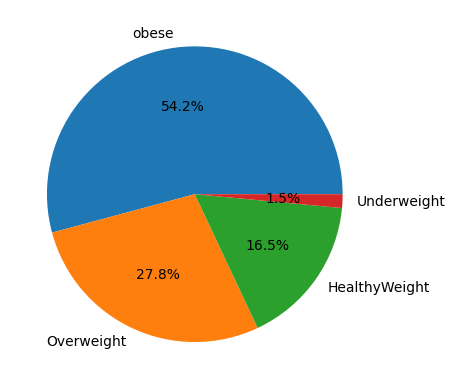

In [219]:
plt.pie(health_list,labels=health_count,autopct="%1.1f%%")
plt.show()

In [220]:
df['weight'].value_counts()

weight
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [221]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,Overweight
1,18,1,33.770,1,0,southeast,1725.55230,obese
2,28,1,33.000,3,0,southeast,4449.46200,obese
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight
4,32,1,28.880,0,0,northwest,3866.85520,Overweight


In [222]:
weight_dict={'Underweight':1,'HealthyWeight':2,'Overweight':3,'obese':4}
df['weight']=df['weight'].map(weight_dict)

In [223]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [224]:
final_data=pd.get_dummies(df).astype(int)   # true or false are 0 or 1
# one hot encoding
final_data.head()

,age,gender,bmi,children,smoker,charges,weight,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


##### x and y split

##### divide data into x and y

In [225]:
x=final_data.drop('charges',axis='columns')
y=final_data[['charges']]

##### Training and testing by linear regression modal

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
# trainning and testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [229]:
#obj creation
# hyper parameter turing --> to obtain highest accuracy

# by default parameters:-
lnr=LinearRegression()
dtr=DecisionTreeRegressor()
rnd=RandomForestRegressor()

dtr.fit(x_train,y_train)
lnr.fit(x_train,y_train)
rnd.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

##### modal evaluation

In [230]:
print("dtr training score:",round(dtr.score(x_train,y_train)*100,2))
print("dtr testing score",round(dtr.score(x_test,y_test)*100,2))
print("lnr training score:",round(lnr.score(x_train,y_train)*100,2))
print("lnr testing score",round(lnr.score(x_test,y_test)*100,2))
print("rnd training score:",round(rnd.score(x_train,y_train)*100,2))
print("rnd testing score",round(rnd.score(x_test,y_test)*100,2))

dtr training score: 99.78
dtr testing score 77.22
lnr training score: 75.92
lnr testing score 72.46
rnd training score: 97.63
rnd testing score 84.97


In [231]:
# prediction
prediction_linar=lnr.predict(x_test)
prediction_dicision=dtr.predict(x_test)
prediction_random=rnd.predict(x_test)


In [232]:
comparison_df=pd.concat([x_test,y_test],axis=1)
comparison_df

,age,gender,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest,charges
897,19,1,25,1,0,3,0,1,0,0,2221
114,52,1,32,3,0,4,1,0,0,0,11488
47,28,0,34,0,0,4,0,1,0,0,3556
1100,33,0,19,2,1,2,1,0,0,0,16776
1175,22,0,27,0,0,3,0,0,0,1,2154
...,...,...,...,...,...,...,...,...,...,...,...
392,48,1,31,1,0,4,1,0,0,0,8964
1312,34,1,42,1,0,4,0,0,0,1,4536
722,62,1,37,0,0,4,0,0,0,1,12979
363,21,0,26,1,0,3,0,0,0,1,2597


In [233]:
comparison_df['LinearRegression']=prediction_linar

comparison_df['DicisionTreeRegression']=prediction_dicision

comparison_df['RandomForestRegression']=prediction_random


In [234]:
comparison_df.head()

,age,gender,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest,charges,LinearRegression,DicisionTreeRegression,RandomForestRegression
897,19,1,25,1,0,3,0,1,0,0,2221,1882.163370,1632.0,3043.940000
114,52,1,32,3,0,4,1,0,0,0,11488,14935.931602,29186.0,17652.640000
47,28,0,34,0,0,4,0,1,0,0,3556,6997.325056,19673.0,8838.470000
1100,33,0,19,2,1,2,1,0,0,0,16776,28457.245062,19023.0,18354.180000
1175,22,0,27,0,0,3,0,0,0,1,2154,2081.544199,2150.0,3399.783929


In [235]:
comparison_df.to_csv('prediction.csv',index=False)

##### saving the modals

In [236]:
import joblib,os   # os for creation of folder

In [237]:
os.makedirs("models",exist_ok=True)
joblib.dump(lnr,'./models/linearmodel.lb')
joblib.dump(dtr,'./models/decisiontree.lb')
joblib.dump(rnd,'./models/randomforest.lb')


['./models/randomforest.lb']

In [238]:
x_train

,age,gender,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest
705,33,0,32,2,0,4,0,0,0,1
1028,54,1,31,0,0,4,0,0,0,1
491,61,0,25,0,0,3,0,0,1,0
492,18,0,25,0,0,3,1,0,0,0
444,56,1,26,1,1,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
622,49,0,21,1,0,2,0,0,0,1
319,32,1,37,1,0,4,1,0,0,0
1111,38,1,38,3,1,4,0,0,1,0
836,36,1,31,0,0,4,0,0,0,1


In [239]:
os.listdir()

['.git',
 'combined',
 'combined.csv',
 'database.py',
 'insurance.csv',
 'insurance.db',
 'insurence.ipynb',
 'models',
 'myimg.jpg',
 'prediction.csv',
 'requirements.txt',
 'static',
 'templates',
 'web.py']

### Web App

In [240]:
x_train.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'weight',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [241]:
x

,age,gender,bmi,children,smoker,weight,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,3,0,0,0,1
1,18,1,33,1,0,4,0,0,1,0
2,28,1,33,3,0,4,0,0,1,0
3,33,1,22,0,0,2,0,1,0,0
4,32,1,28,0,0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,4,0,1,0,0
1334,18,0,31,0,0,4,1,0,0,0
1335,18,0,36,0,0,4,0,0,1,0
1336,21,0,25,0,0,3,0,0,0,1


In [242]:
x_train.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'weight',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [243]:
df

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,4
1334,18,0,31.920,0,0,northeast,2205.98080,4
1335,18,0,36.850,0,0,southeast,1629.83350,4
1336,21,0,25.800,0,0,southwest,2007.94500,3


#### to improve the performance of model or algo-->
##### 1)change your data pre-processing   2) get sufficient amount data    3) change your algo for correct accuracy (linear,Dt,Randomforest,and other algo)    4) default parameters-- hyper parameter turing 

#### remove bmi col from final data and check score changes and region col are label encode again train algo. 

In [244]:
final_data.head()

,age,gender,bmi,children,smoker,charges,weight,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [245]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [246]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [247]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [248]:
region_key=['southeast','southeast','northwest','northeast']
region_key

['southeast', 'southeast', 'northwest', 'northeast']

In [249]:
region_count=df['region'].value_counts().values
region_count

array([364, 325, 325, 324])

In [250]:
region_dict={'northeast':1,'northwest':2,'southwest':3,'southeast':4}
region_dict

{'northeast': 1, 'northwest': 2, 'southwest': 3, 'southeast': 4}

In [251]:
df['region']=df['region'].map(region_dict)

In [252]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,4,1725.55230,4
2,28,1,33.000,3,0,4,4449.46200,4
3,33,1,22.705,0,0,2,21984.47061,2
4,32,1,28.880,0,0,2,3866.85520,3


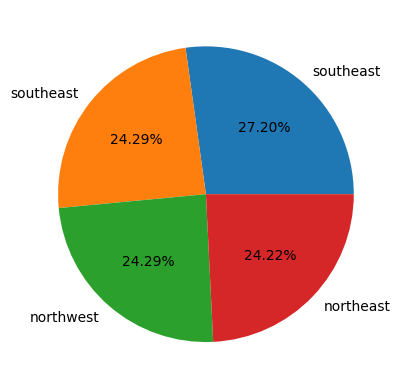

In [253]:
plt.pie(region_count,labels=region_key,autopct="%1.2f%%")
plt.show()

In [254]:
df.head()

,age,gender,bmi,children,smoker,region,charges,weight
0,19,0,27.900,0,1,3,16884.92400,3
1,18,1,33.770,1,0,4,1725.55230,4
2,28,1,33.000,3,0,4,4449.46200,4
3,33,1,22.705,0,0,2,21984.47061,2
4,32,1,28.880,0,0,2,3866.85520,3


In [255]:
x=df.drop('charges',axis=1)
y=df['charges']

In [256]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [257]:
x

,age,gender,bmi,children,smoker,region,weight
0,19,0,27.900,0,1,3,3
1,18,1,33.770,1,0,4,4
2,28,1,33.000,3,0,4,4
3,33,1,22.705,0,0,2,2
4,32,1,28.880,0,0,2,3
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,4
1334,18,0,31.920,0,0,1,4
1335,18,0,36.850,0,0,4,4
1336,21,0,25.800,0,0,3,3


In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [259]:
from sklearn.model_selection import train_test_split


In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [261]:
linear=LinearRegression()
decision=DecisionTreeRegressor()
random_forest=RandomForestRegressor()

In [262]:
x_train.shape,y_train.shape

((1070, 7), (1070,))

In [263]:
x_train

,age,gender,bmi,children,smoker,region,weight
75,57,1,34.010,0,0,2,4
335,64,1,34.500,0,0,3,4
28,23,1,17.385,1,0,2,1
1004,47,1,19.190,1,0,1,2
754,24,1,33.630,4,0,1,4
...,...,...,...,...,...,...,...
977,26,1,29.150,1,0,4,3
616,56,0,28.595,0,0,1,3
874,44,1,21.850,3,0,1,2
880,22,1,34.800,3,0,3,4


In [264]:
y_train

75      11356.66090
335     13822.80300
28       2775.19215
1004     8627.54110
754     17128.42608
           ...     
977      2902.90650
616     11658.11505
874      8891.13950
880      3443.06400
1067     5757.41345
Name: charges, Length: 1070, dtype: float64

In [265]:
linear.fit(x_train,y_train)
decision.fit(x_train,y_train)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [266]:
print("training score by linearRegressor : ",linear.score(x_train,y_train)*100)
print("Testing score by linearRegressor : ",linear.score(x_test,y_test)*100)
print("training score by decisionTreeRegressor : ",decision.score(x_train,y_train)*100)
print("Testing score by decisionTreeRegressor : ",decision.score(x_test,y_test)*100)
print("training score by randomForestRegressor : ",random_forest.score(x_train,y_train)*100)
print("Testing score by randomForestRegressor : ",random_forest.score(x_test,y_test)*100)

training score by linearRegressor :  75.74330307301274
Testing score by linearRegressor :  73.05432141683414
training score by decisionTreeRegressor :  99.83778016021814
Testing score by decisionTreeRegressor :  54.08979617290128
training score by randomForestRegressor :  97.62508958184472
Testing score by randomForestRegressor :  81.60075007529323


In [267]:
linear_pred=linear.predict(x_test)
decision_pred=decision.predict(x_test)
random_pred=random_forest.predict(x_test)

In [268]:
combined=pd.concat((x_test,y_test),axis=1)
combined

,age,gender,bmi,children,smoker,region,weight,charges
436,22,1,31.730,0,0,1,4,2254.79670
114,52,1,32.205,3,0,1,4,11488.31695
566,38,0,40.565,1,0,2,4,6373.55735
91,53,0,24.795,1,0,2,2,10942.13205
873,43,1,30.100,1,0,3,4,6849.02600
...,...,...,...,...,...,...,...,...
1113,28,0,26.315,3,0,2,3,5312.16985
6,46,0,33.440,1,0,4,4,8240.58960
577,31,0,38.095,1,1,1,4,58571.07448
860,37,0,47.600,2,1,3,4,46113.51100


In [269]:
combined['LinearRegression']=linear_pred
combined['DecisionTreeRegression']=decision_pred
combined['RandomForestRegression']=random_pred

In [270]:
combined.head()

,age,gender,bmi,children,smoker,region,weight,charges,LinearRegression,DecisionTreeRegression,RandomForestRegression
436,22,1,31.730,0,0,1,4,2254.79670,4926.093251,2055.32490,3741.414018
114,52,1,32.205,3,0,1,4,11488.31695,14139.004450,11264.54100,15605.319710
566,38,0,40.565,1,0,2,4,6373.55735,10701.680298,6112.35295,8515.918168
91,53,0,24.795,1,0,2,2,10942.13205,8955.116869,25517.11363,15679.465863
873,43,1,30.100,1,0,3,4,6849.02600,10177.694398,7441.05300,7147.373396


In [271]:
combined.to_csv('combined.csv')

In [272]:
x_train

,age,gender,bmi,children,smoker,region,weight
75,57,1,34.010,0,0,2,4
335,64,1,34.500,0,0,3,4
28,23,1,17.385,1,0,2,1
1004,47,1,19.190,1,0,1,2
754,24,1,33.630,4,0,1,4
...,...,...,...,...,...,...,...
977,26,1,29.150,1,0,4,3
616,56,0,28.595,0,0,1,3
874,44,1,21.850,3,0,1,2
880,22,1,34.800,3,0,3,4
